In [2]:
using Posets
import Distributions: MvNormal
using Plots
using LinearAlgebra

# Definciones: metodos y variables

In [3]:
dimension = 2
numeronodos= 4

4

In [4]:
mat = [1. .3; .3 1.]
matsesgada = [2.6 2.4; 2.4 2.6]
nmat = [0.01 0.; 0. 0.01]

2×2 Array{Float64,2}:
 0.01  0.0
 0.0   0.01

In [5]:
function metametodo(metodo, puntuaciones, puntuaciononly::Bool)
    ranks = [sortperm(puntuaciones[:,x], rev = true) for x in 1:size(puntuaciones)[2]];
    if puntuaciononly
        poset = metodo(puntuaciones)
    else # con rankings
        poset = metodo(ranks)
    end
    [energia_local(r, poset) for r in ranks]
end
function metametodo_poset(metodo, poseto, puntuaciones, puntuaciononly::Bool)
    ranks = [sortperm(puntuaciones[:,x], rev = true) for x in 1:size(puntuaciones)[2]];
    if puntuaciononly
        poset = metodo(puntuaciones)
    else # con rankings
        poset = metodo(ranks)
    end
    norm(poseto - poset)
end

metametodo_poset (generic function with 1 method)

In [6]:
function metametodo_enmasa(metodo, numeromuestras, numranks, numnodos; varerror = 0.01, matnodos = 1)
    listapuntuacion = [generapuntuaciones_gaussian(numranks,numnodos,2 #=dim=#;varerror = varerror, matnodos = matnodos)[2] for _ in 1:numeromuestras];
    output = Float64[]
    for puntuacion in listapuntuacion
        ranks = [sortperm(puntuacion[:,x], rev = true) for x in 1:size(puntuacion)[2]];
        poset = metodo(puntuacion)
        [push!( output, energia_local(r, poset) ) for r in ranks]
    end
    output
end

metametodo_enmasa (generic function with 1 method)

In [7]:
corte0p70 = x -> αcut_poset(x |>fuzzy, 0.70)
corte0p80 = x -> αcut_poset(x |>fuzzy, 0.80)
corte0p90 = x -> αcut_poset(x |>fuzzy, 0.90)
corte0p95 = x -> αcut_poset(x |>fuzzy, 0.95)
corte0p98 = x -> αcut_poset(x |>fuzzy, 0.98)

#22 (generic function with 1 method)

In [8]:
metodom2 = x -> x |> m2 |> pareja_matrizadyacencia
metodom3 = x -> x |> m3 |> pareja_matrizadyacencia

#26 (generic function with 1 method)

# Digresion

In [9]:
nosesgo = metametodo_enmasa(corte0p70, 10^3, 20, 7);
sisesgo = metametodo_enmasa(corte0p70, 10^3, 20, 7;matnodos = matsesgada);

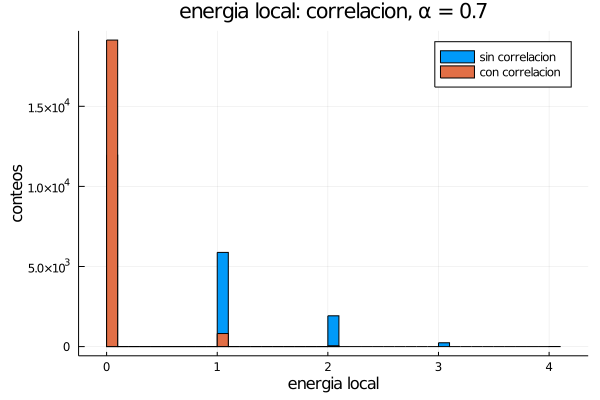

In [10]:
histogram([nosesgo,sisesgo],labels = ["sin correlacion" "con correlacion"], title = "energia local: correlacion, α = 0.7",
xlabel="energia local",
ylabel="conteos")

In [11]:
nosesgo = metametodo_enmasa(corte0p90, 10^3, 20, 7);
sisesgo = metametodo_enmasa(corte0p90, 10^3, 20, 7;matnodos = matsesgada);

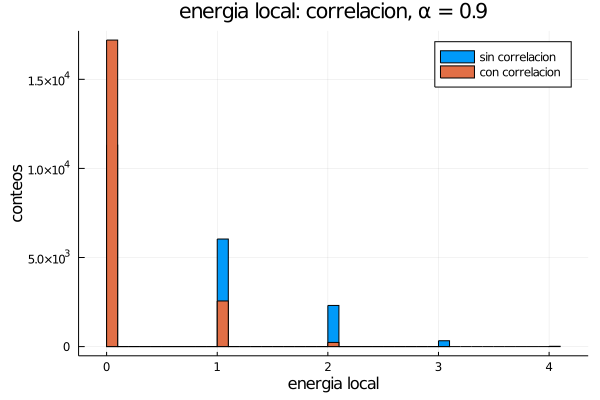

In [12]:
histogram([nosesgo,sisesgo],labels = ["sin correlacion" "con correlacion"], title = "energia local: correlacion, α = 0.9",
xlabel="energia local",
ylabel="conteos")

In [13]:
nosesgo = metametodo_enmasa(corte0p95, 10^3, 20, 7);
sisesgo = metametodo_enmasa(corte0p95, 10^3, 20, 7;matnodos = matsesgada);

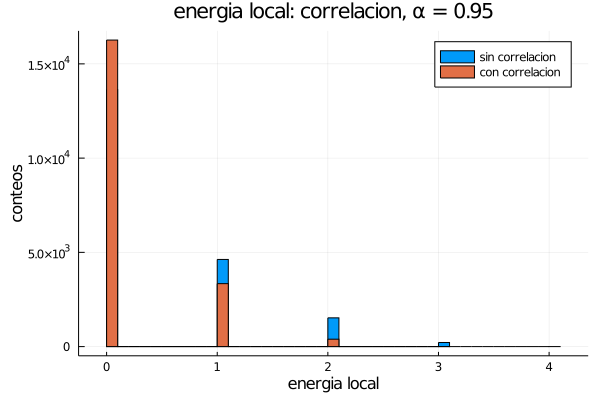

In [14]:
histogram([nosesgo,sisesgo],labels = ["sin correlacion" "con correlacion"], title = "energia local: correlacion, α = 0.95",
xlabel="energia local",
ylabel="conteos")

###  Comparativa ruido

In [15]:
nosesgo0p1 = metametodo_enmasa(corte0p90, 10^3, 20, 7;varerror = 0.1);
nosesgo0p5 = metametodo_enmasa(corte0p90, 10^3, 20, 7;varerror = 0.5);
nosesgo1p0 = metametodo_enmasa(corte0p90, 10^3, 20, 7;varerror = 0.99);

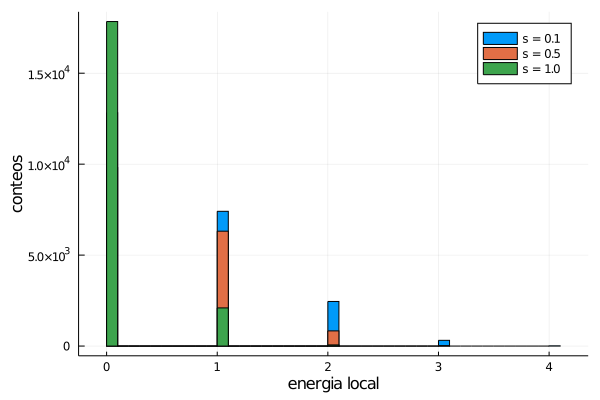

In [16]:
histogram([nosesgo0p1,nosesgo0p5,nosesgo1p0], labels = ["s = 0.1" "s = 0.5" "s = 1.0"],
xlabel="energia local",
ylabel="conteos")

###  Comparativa ruido + correlacion

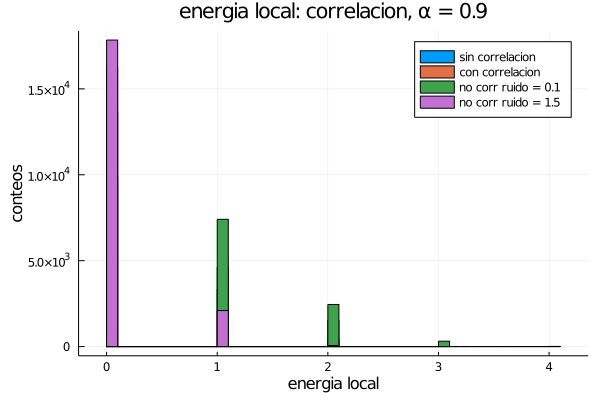

In [17]:
histogram([nosesgo,sisesgo,nosesgo0p1,nosesgo1p0],labels = ["sin correlacion" "con correlacion" "no corr ruido = 0.1" "no corr ruido = 1.5"], title = "energia local: correlacion, α = 0.9",
xlabel="energia local",
ylabel="conteos")

# Datos

In [72]:
ejemplo = [generapuntuaciones_gaussian(20,7,2)[2] for _ in 1:10^3];

In [73]:
anima_corte0p98 = [metametodo(corte0p98, ej, true) for ej in ejemplo];
anima_corte0p95 = [metametodo(corte0p95, ej, true) for ej in ejemplo];
anima_corte0p90 = [metametodo(corte0p90, ej, true) for ej in ejemplo];
anima_corte0p80 = [metametodo(corte0p80, ej, true) for ej in ejemplo];

In [74]:
anima_metodom2 = [metametodo(metodom2, ej, true) for ej in ejemplo];

In [75]:
anima_metodom3 = [metametodo(metodom3, ej, true) for ej in ejemplo];

In [76]:
ejemplo_sinruido_sesgo = [generapuntuaciones_gaussian(20,7,2;matnodos=matsesgada)[2] for _ in 1:10^3];

In [77]:
anima_corte0p98_sinruido_sesgo = [metametodo(corte0p98, ej, true) for ej in ejemplo_sinruido_sesgo];
anima_corte0p95_sinruido_sesgo = [metametodo(corte0p95, ej, true) for ej in ejemplo_sinruido_sesgo];
anima_corte0p90_sinruido_sesgo = [metametodo(corte0p90, ej, true) for ej in ejemplo_sinruido_sesgo];
anima_corte0p80_sinruido_sesgo = [metametodo(corte0p80, ej, true) for ej in ejemplo_sinruido_sesgo];

In [78]:
anima_metodom2_sinruido_sesgo = [metametodo(metodom2, ej, true) for ej in ejemplo_sinruido_sesgo];

In [79]:
anima_metodom3_sinruido_sesgo = [metametodo(metodom3, ej, true) for ej in ejemplo_sinruido_sesgo];

In [80]:
ejemplo_ruido = [generapuntuaciones_gaussian(20,7,2;ruido=true)[2] for _ in 1:10^3];

In [81]:
anima_corte0p98_ruido = [metametodo(corte0p98, ej, true) for ej in ejemplo_ruido];
anima_corte0p95_ruido = [metametodo(corte0p95, ej, true) for ej in ejemplo_ruido];
anima_corte0p90_ruido = [metametodo(corte0p90, ej, true) for ej in ejemplo_ruido];
anima_corte0p80_ruido = [metametodo(corte0p80, ej, true) for ej in ejemplo_ruido];

In [82]:
anima_metodom2_ruido = [metametodo(metodom2, ej, true) for ej in ejemplo_ruido];

In [83]:
anima_metodom3_ruido = [metametodo(metodom3, ej, true) for ej in ejemplo_ruido];

In [84]:
ejemplo_ruido_sesgo = [generapuntuaciones_gaussian(20,7,2;ruido=true,matnodos=matsesgada)[2] for _ in 1:10^3];

In [85]:
anima_corte0p98_ruido_sesgo = [metametodo(corte0p98, ej, true) for ej in ejemplo_ruido_sesgo];
anima_corte0p95_ruido_sesgo = [metametodo(corte0p95, ej, true) for ej in ejemplo_ruido_sesgo];
anima_corte0p90_ruido_sesgo = [metametodo(corte0p90, ej, true) for ej in ejemplo_ruido_sesgo];
anima_corte0p80_ruido_sesgo = [metametodo(corte0p80, ej, true) for ej in ejemplo_ruido_sesgo];

In [86]:
anima_metodom2_ruido_sesgo = [metametodo(metodom2, ej, true) for ej in ejemplo_ruido_sesgo];

In [87]:
anima_metodom3_ruido_sesgo = [metametodo(metodom3, ej, true) for ej in ejemplo_ruido_sesgo];

In [88]:
ejemplo_miniruido_sesgo = [generapuntuaciones_gaussian(20,7,2;ruido=true,matnodos=matsesgada, matruido = nmat)[2] for _ in 1:10^3];

In [89]:
anima_corte0p98_miniruido_sesgo = [metametodo(corte0p98, ej, true) for ej in ejemplo_miniruido_sesgo];
anima_corte0p95_miniruido_sesgo = [metametodo(corte0p95, ej, true) for ej in ejemplo_miniruido_sesgo];
anima_corte0p90_miniruido_sesgo = [metametodo(corte0p90, ej, true) for ej in ejemplo_miniruido_sesgo];
anima_corte0p80_miniruido_sesgo = [metametodo(corte0p80, ej, true) for ej in ejemplo_miniruido_sesgo];

In [90]:
anima_metodom2_miniruido_sesgo = [metametodo(metodom2, ej, true) for ej in ejemplo_miniruido_sesgo];

In [91]:
anima_metodom3_miniruido_sesgo = [metametodo(metodom3, ej, true) for ej in ejemplo_miniruido_sesgo];

# Resultados

Se comparan los valores de __enegia local__ para distintos valores de $\alpha$ asi como
con distintos valores de __ruido__ tanto para los puntos-nodos como para la comparativa.

Conclusión: si se introduce sesgo no importa el ruido.

### Corte alfa = 0.80

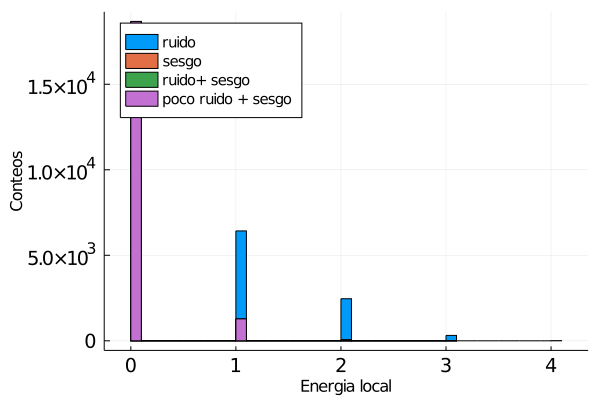

In [92]:
histogram([vcat(anima_corte0p80_ruido...), vcat(anima_corte0p80_sinruido_sesgo...), vcat(anima_corte0p80_ruido_sesgo...), vcat(anima_corte0p80_miniruido_sesgo...)],
    xtickfontsize=13, ytickfontsize=13,
xlabel="Energia local", ylabel="Conteos",
    labels = ["ruido" "sesgo" "ruido+ sesgo" "poco ruido + sesgo"],
legend = :topleft,legendfontsize=10)

### Corte alfa = 0.95

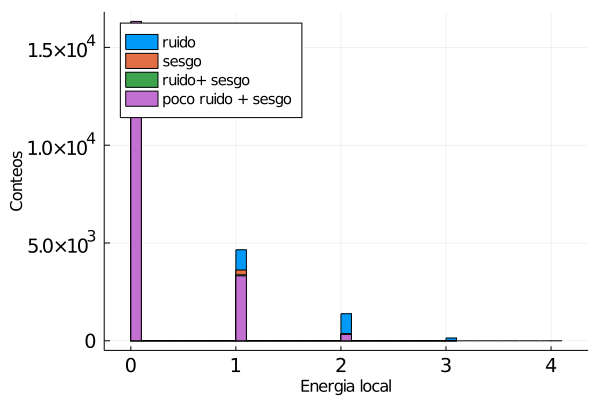

In [93]:
histogram([vcat(anima_corte0p95_ruido...), vcat(anima_corte0p95_sinruido_sesgo...),vcat(anima_corte0p95_ruido_sesgo...), vcat(anima_corte0p95_miniruido_sesgo...)],
    xtickfontsize=13, ytickfontsize=13,
xlabel="Energia local", ylabel="Conteos",
    legend = :topleft,
    labels = ["ruido" "sesgo" "ruido+ sesgo" "poco ruido + sesgo"],legendfontsize=10)

### Corte alfa = 0.98

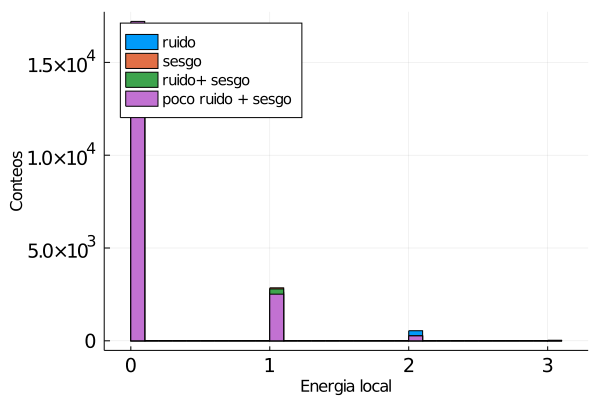

In [94]:
histogram([vcat(anima_corte0p98_ruido...), vcat(anima_corte0p98_sinruido_sesgo...),vcat(anima_corte0p98_ruido_sesgo...), vcat(anima_corte0p98_miniruido_sesgo...)],
    xtickfontsize=13, ytickfontsize=13,
    xlabel="Energia local", ylabel="Conteos",
    legend = :topleft,
    labels = ["ruido" "sesgo" "ruido+ sesgo" "poco ruido + sesgo"],legendfontsize=10)

### metodo m2

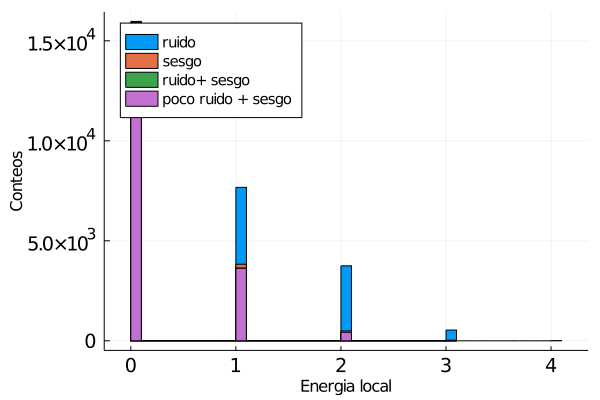

In [95]:
histogram([vcat(anima_metodom2_ruido...), vcat(anima_metodom2_sinruido_sesgo...),vcat(anima_metodom2_ruido_sesgo...), vcat(anima_metodom2_miniruido_sesgo...)],
    xtickfontsize=13, ytickfontsize=13,
    xlabel="Energia local", ylabel="Conteos",
    legend = :topleft,
    labels = ["ruido" "sesgo" "ruido+ sesgo" "poco ruido + sesgo"],legendfontsize=10)

### metodo m3

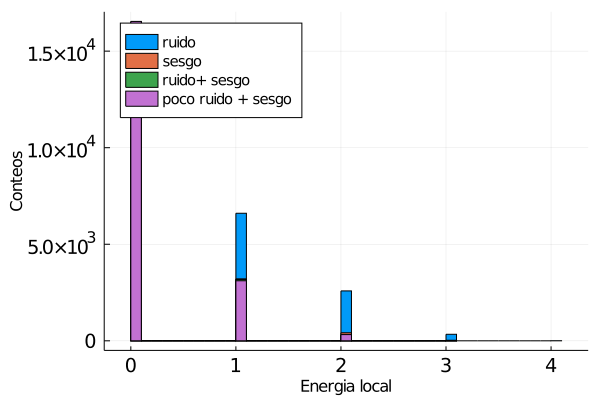

In [96]:
histogram([vcat(anima_metodom3_ruido...), vcat(anima_metodom3_sinruido_sesgo...),vcat(anima_metodom3_ruido_sesgo...), vcat(anima_metodom3_miniruido_sesgo...)],
    xtickfontsize=13, ytickfontsize=13,
    xlabel="Energia local", ylabel="Conteos",
    legend = :topleft,
    labels = ["ruido" "sesgo" "ruido+ sesgo" "poco ruido + sesgo"],legendfontsize=10)

# Analisis sesgo usando norma posets

In [97]:
mat = [1. .3; .3 1.]
matsesgada = [2.6 2.4; 2.4 2.6]
nmat = [0.01 0.; 0. 0.01]

2×2 Array{Float64,2}:
 0.01  0.0
 0.0   0.01

## Sesgo $\alpha = 70$

In [98]:
sesgo_70pts=Float64[]

sinsesgo_70pts=Float64[]

Float64[]

In [99]:
for _ in 1:10^2
    pdp, puntos = generapuntuaciones_gaussian(20,7,2;matnodos=matsesgada)
    push!(sesgo_70pts, metametodo_poset(corte0p70, pdp, puntos, true))
end

for _ in 1:10^2
    pdp, puntos = generapuntuaciones_gaussian(20,7,2)
    push!(sinsesgo_70pts, metametodo_poset(corte0p70, pdp, puntos, true))
end

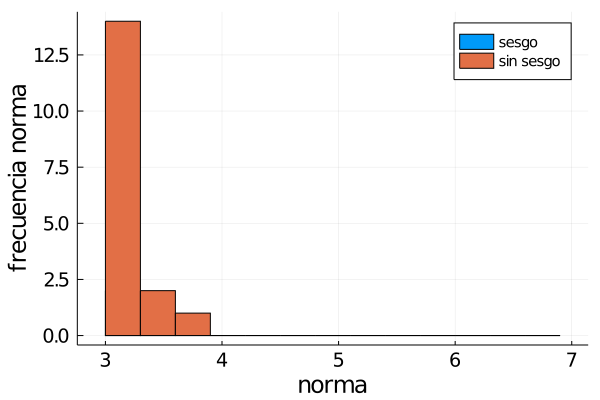

In [100]:
histogram([sesgo_70pts,sinsesgo_70pts],bins=3:0.3:7,labels=["sesgo" "sin sesgo"], xtickfontsize=13, ytickfontsize=13, xguidefontsize=16, yguidefontsize=16, legendfontsize=10,xlabel="norma", ylabel="frecuencia norma")

## Sesgo $\alpha = 80$

In [101]:
sesgo_80pts=Float64[]

sinsesgo_80pts=Float64[]

Float64[]

In [102]:
for _ in 1:10^2
    pdp, puntos = generapuntuaciones_gaussian(20,7,2;matnodos=matsesgada)
    push!(sesgo_80pts, metametodo_poset(corte0p80, pdp, puntos, true))
end

for _ in 1:10^2
    pdp, puntos = generapuntuaciones_gaussian(20,7,2)
    push!(sinsesgo_80pts, metametodo_poset(corte0p80, pdp, puntos, true))
end

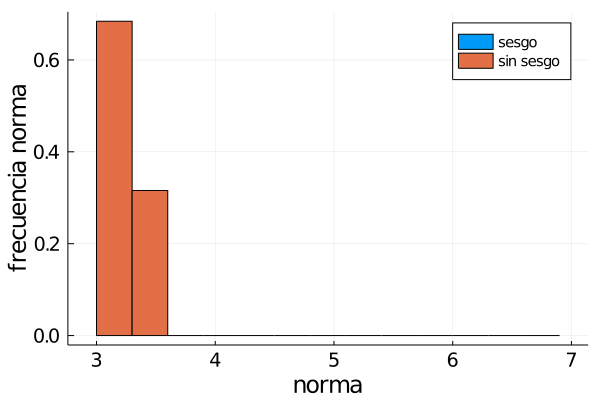

In [103]:
histogram([sesgo_80pts,sinsesgo_80pts],labels=["sesgo" "sin sesgo"],bins=3:0.3:7,normalize=:probability, xtickfontsize=13, ytickfontsize=13, xguidefontsize=16, yguidefontsize=16, legendfontsize=10,xlabel="norma", ylabel="frecuencia norma")

## Sesgo $\alpha = 95$

In [104]:
sesgo_95pts=Float64[]

sinsesgo_95pts=Float64[]

Float64[]

In [105]:
for _ in 1:10^2
    pdp, puntos = generapuntuaciones_gaussian(20,7,2;matnodos=matsesgada)
    push!(sesgo_95pts, metametodo_poset(corte0p95, pdp, puntos, true))
end

for _ in 1:10^2
    pdp, puntos = generapuntuaciones_gaussian(20,7,2)
    push!(sinsesgo_95pts, metametodo_poset(corte0p95, pdp, puntos, true))
end

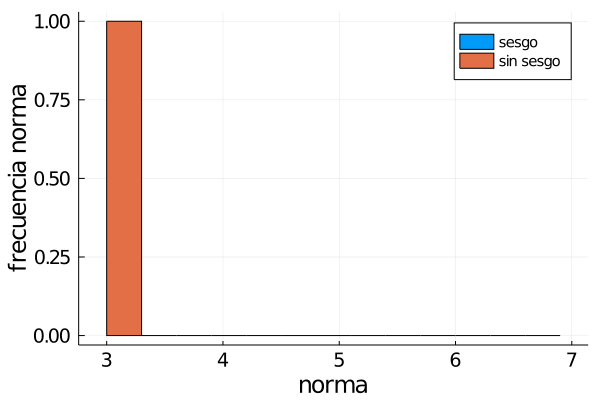

In [106]:
histogram([sesgo_95pts,sinsesgo_95pts],labels=["sesgo" "sin sesgo"],bins=3:0.3:7,normalize=:probability, xtickfontsize=13, ytickfontsize=13, xguidefontsize=16, yguidefontsize=16, legendfontsize=10,xlabel="norma", ylabel="frecuencia norma")

# Analisis de las distribuciones

In [107]:
mat = [1. .3; .3 1.]
matsesgada = [2.6 2.4; 2.4 2.6]
nmat = [0.01 0.; 0. 0.01]

2×2 Array{Float64,2}:
 0.01  0.0
 0.0   0.01

In [108]:
puntos_sesgo = rand(MvNormal([0 for _ in 1:2],matsesgada),10^3)

2×1000 Array{Float64,2}:
 0.717709  2.6406   0.619287  -0.726663  …  1.71031  3.3274   0.0825961
 0.704618  2.30139  0.773748  -1.13231      1.60148  2.5417  -0.195886

In [109]:
puntos_normal = rand(MvNormal([0 for _ in 1:2],mat),10^3)

2×1000 Array{Float64,2}:
 -0.392403  -0.130945  1.25685   1.75436   …  2.21393   -0.199131  -0.3177
  0.566156  -0.927517  2.02228  -0.201425     0.788626   1.24574    1.19332

In [110]:
puntos_miniruido = rand(MvNormal([0 for _ in 1:2],nmat),10^3)

2×1000 Array{Float64,2}:
 -0.00212902   0.0265866  -0.0687543  …   0.22025    0.208126  0.0660617
  0.166006    -0.133658    0.0232395     -0.162978  -0.164891  0.140792

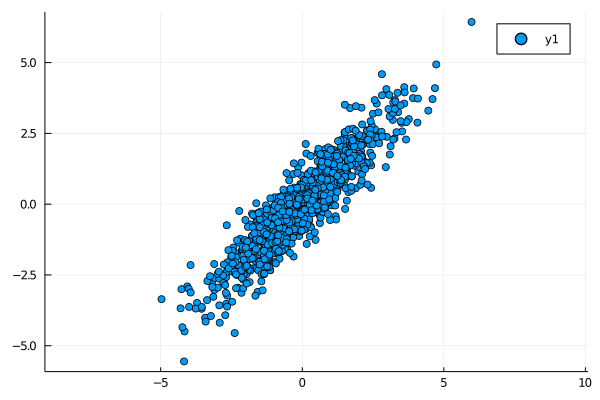

In [111]:
scatter( [(puntos_sesgo[:,i][1],puntos_sesgo[:,i][2]) for i in 1:10^3],ratio = :equal)

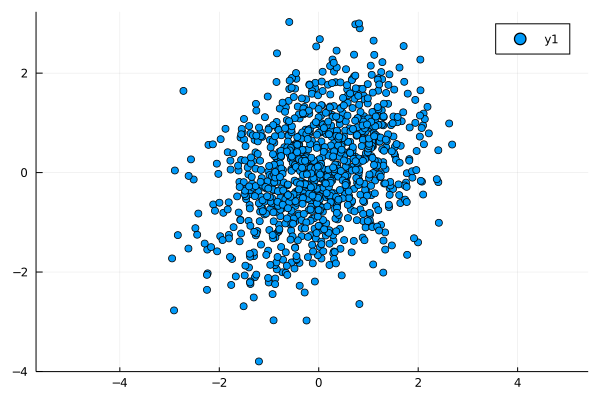

In [112]:
scatter( [(puntos_normal[:,i][1],puntos_normal[:,i][2]) for i in 1:10^3],ratio = :equal)